<a href="https://colab.research.google.com/github/hirukad/Comprehensive-Breast-Cancer-Analysis-ML/blob/main/breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A machine learning model that can predict whether a tumor is malignant (cancerous) or benign (non-cancerous) using medical data (measurements of cell features).

Loading the libraries

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

Loading the datasets

In [158]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(f"Train DF shape : {train_df.shape}")
print(f"Test DF shape : {test_df.shape}")

Train DF shape : (455, 32)
Test DF shape : (114, 31)


In [159]:
train_df.head()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,90524101,M,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,89346,B,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
3,902975,B,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
4,904969,B,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


EDA

In [160]:
train_df.isnull().sum() ,test_df.isnull().sum()

(id                         0
 label                      0
 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
 concave points_mean        0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
 dtype: int64,
 id                      

In [161]:
train_df.duplicated().sum() , test_df.duplicated().sum()

(np.int64(0), np.int64(0))

In [162]:
print(train_df['label'])

0      M
1      M
2      B
3      B
4      B
      ..
450    M
451    B
452    M
453    B
454    B
Name: label, Length: 455, dtype: object


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

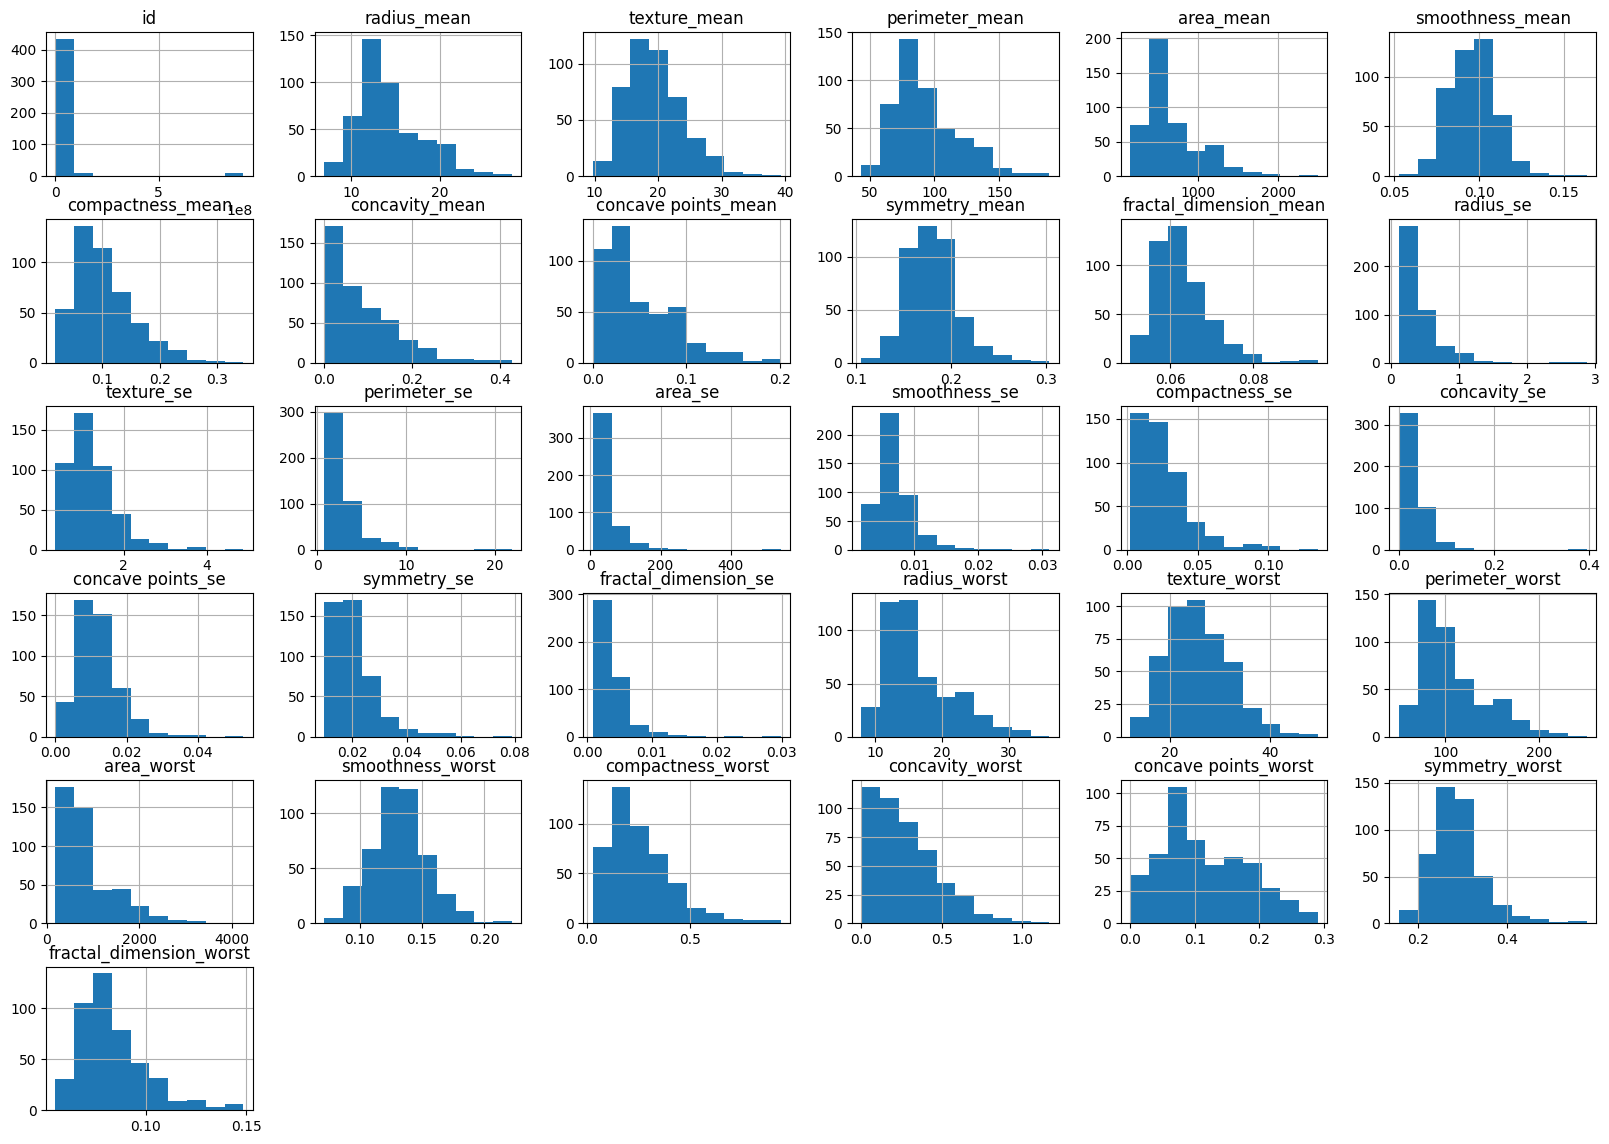

In [163]:
train_df.hist(figsize=(20,14))

Target variable



<Axes: >

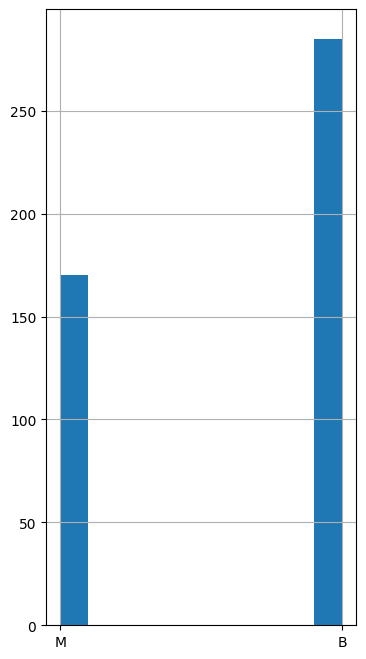

In [164]:
train_df['label'].hist(figsize=(4,8))

<Axes: >

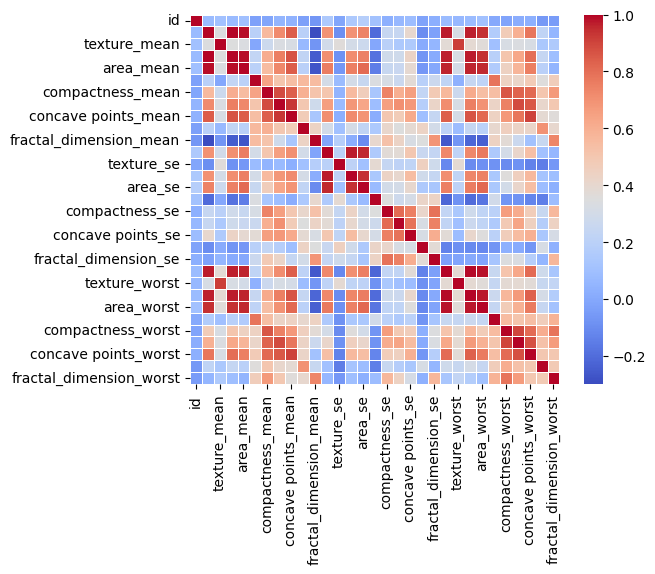

In [165]:
numerical_data = train_df.drop('label',axis=1)
corr_matrix= numerical_data.corr()
sns.heatmap(corr_matrix,
            annot=False,
            cmap='coolwarm',
            linewidths=0.5,
            square=True)


In [166]:
# Set the threshold
threshold = 0.8

# Get pairs of correlated features
corr_pairs = corr_matrix.unstack()   #series with id as both the indexs
# Remove self-correlation (correlation of feature with itself)
corr_pairs = corr_pairs[corr_pairs != 1]

# Filter by threshold
high_corr = corr_pairs[abs(corr_pairs) > threshold].sort_values(ascending=False)
print(high_corr)


radius_mean           perimeter_mean          0.998113
perimeter_mean        radius_mean             0.998113
perimeter_worst       radius_worst            0.993748
radius_worst          perimeter_worst         0.993748
area_mean             radius_mean             0.987475
                                                ...   
radius_worst          concave points_worst    0.807853
compactness_se        concavity_se            0.807339
concavity_se          compactness_se          0.807339
perimeter_mean        concave points_worst    0.800015
concave points_worst  perimeter_mean          0.800015
Length: 86, dtype: float64


In [167]:
to_drop = set()
for i, j in high_corr.index:
    if j not in to_drop:
        to_drop.add(j)

print("Features to drop:", to_drop)

Features to drop: {'compactness_worst', 'texture_worst', 'area_worst', 'compactness_mean', 'perimeter_mean', 'texture_mean', 'radius_se', 'area_se', 'concave points_worst', 'concave points_mean', 'radius_worst', 'compactness_se', 'concavity_se', 'perimeter_worst', 'radius_mean', 'perimeter_se', 'area_mean', 'concavity_mean', 'concavity_worst'}


In [168]:
train_df_reduced = train_df.drop(columns=to_drop)
test_df_reduced = test_df.drop(columns=to_drop)

In [169]:
print(train_df_reduced.shape)
print(test_df_reduced.shape)

(455, 13)
(114, 12)


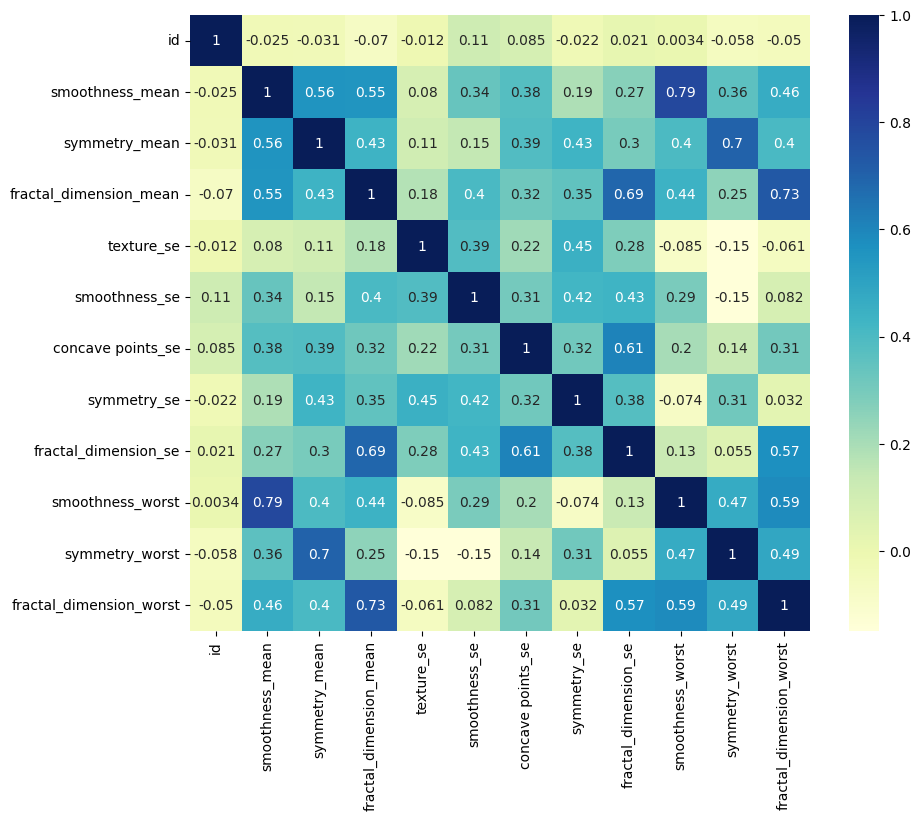

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
numeric_features = train_df_reduced.drop('label',axis=1)
sns.heatmap(numeric_features.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [171]:
# Combine related features
train_df_reduced['smoothness_diff'] = train_df_reduced['smoothness_worst'] - train_df_reduced['smoothness_mean']
test_df_reduced['smoothness_diff'] = test_df_reduced['smoothness_worst'] - test_df_reduced['smoothness_mean']

train_df_reduced['symmetry_var'] = train_df_reduced['symmetry_worst'] - train_df_reduced['symmetry_mean']
test_df_reduced['symmetry_var'] = test_df_reduced['symmetry_worst'] - test_df_reduced['symmetry_mean']

# Combine “mean” and “worst” features as ratios
train_df_reduced['fractal_ratio'] = train_df_reduced['fractal_dimension_worst'] / train_df_reduced['fractal_dimension_mean']
test_df_reduced['fractal_ratio'] = test_df_reduced['fractal_dimension_worst'] / test_df_reduced['fractal_dimension_mean']

<Axes: xlabel='fractal_dimension_mean', ylabel='smoothness_mean'>

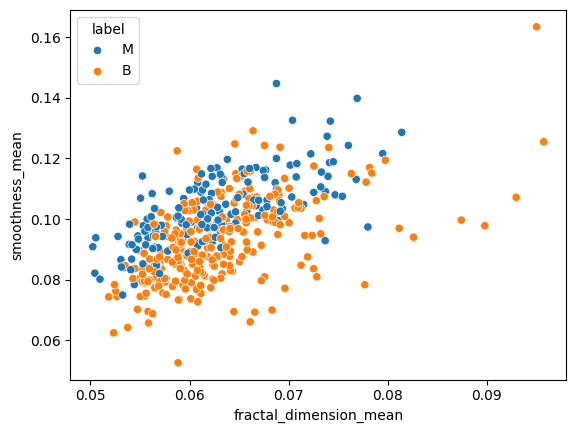

In [172]:
sns.scatterplot(
    data=train_df_reduced,
    x = 'fractal_dimension_mean',
    y= 'smoothness_mean',
    hue = 'label'
)

In [173]:
train_df_reduced['fractal_smooth_ratio'] = train_df_reduced['fractal_dimension_mean'] / train_df_reduced['smoothness_mean']
test_df_reduced['fractal_smooth_ratio'] = test_df_reduced['fractal_dimension_mean'] / test_df_reduced['smoothness_mean']

<Axes: xlabel='texture_se', ylabel='smoothness_se'>

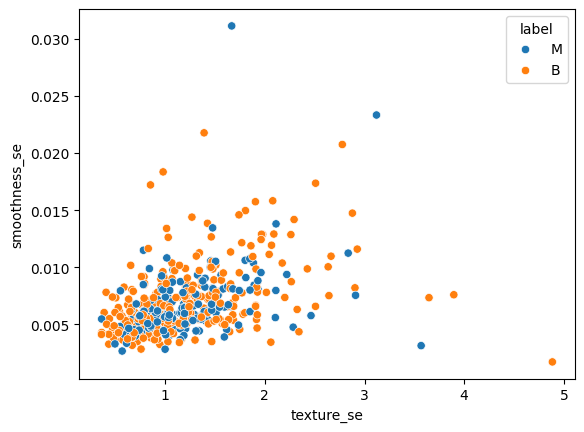

In [174]:
sns.scatterplot(
    data=train_df_reduced,
    x = 'texture_se',
    y= 'smoothness_se',
    hue = 'label'
)

In [175]:
columns = train_df_reduced.columns

In [176]:
train_df_reduced['label'] = train_df_reduced['label'].map({'M':1,'B':0})  #map the target var

In [177]:
lower_pct = 0.01
upper_pct = 0.99

for feature in columns:
    if feature not in ['id','label']:
        lower = train_df_reduced[feature].quantile(lower_pct)
        upper = train_df_reduced[feature].quantile(upper_pct)

        # Clip the feature values within percentile range
        train_df_reduced[feature] = np.clip(train_df_reduced[feature], lower, upper)


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'smoothness_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>],
       [<Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'concave points_se'}>],
       [<Axes: title={'center': 'symmetry_se'}>,
        <Axes: title={'center': 'fractal_dimension_se'}>,
        <Axes: title={'center': 'smoothness_worst'}>,
        <Axes: title={'center': 'symmetry_worst'}>],
       [<Axes: title={'center': 'fractal_dimension_worst'}>,
        <Axes: title={'center': 'smoothness_diff'}>,
        <Axes: title={'center': 'symmetry_var'}>,
        <Axes: title={'center': 'fractal_ratio'}>],
       [<Axes: title={'center': 'fractal_smooth_ratio'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

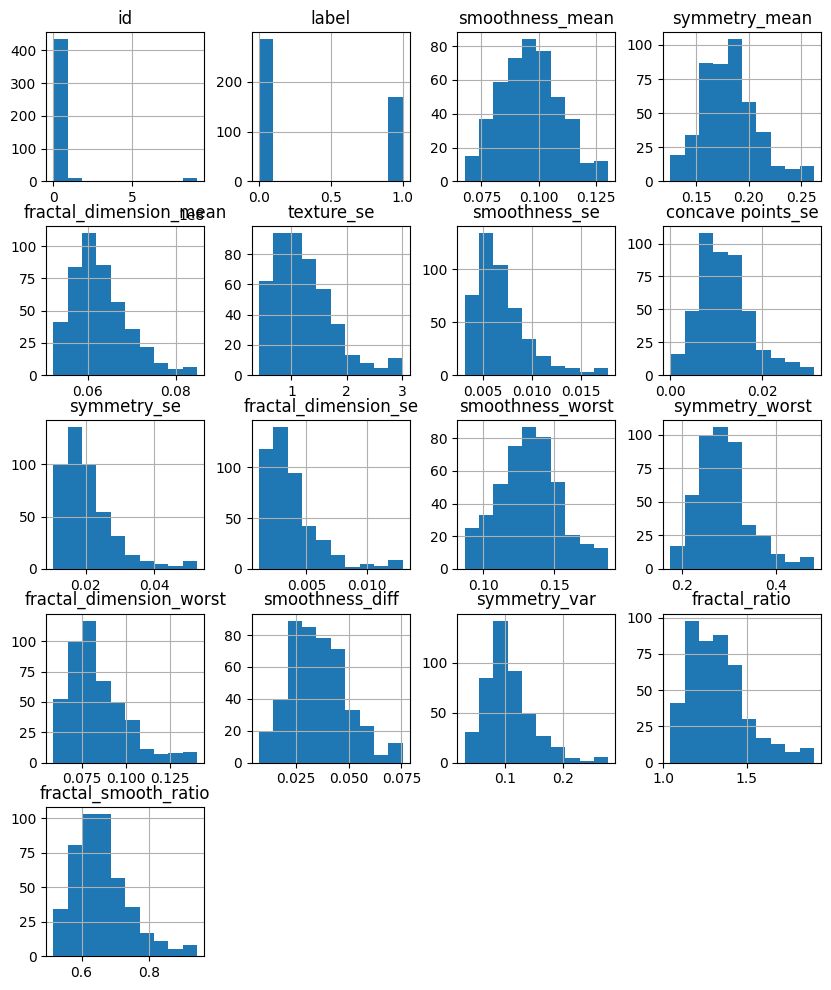

In [178]:
train_df_reduced.hist(figsize=(10,12))

In [179]:
test_id = test_df_reduced['id']   #id series
train_df_reduced = train_df_reduced.drop(columns=['id']) #drop_id
test_df_reduced = test_df_reduced.drop(columns=['id'])
#encoding
train_df_reduced = pd.get_dummies(train_df_reduced)
test_df_reduced = pd.get_dummies(test_df_reduced)

train_df_reduced.head()

,label,smoothness_mean,symmetry_mean,fractal_dimension_mean,texture_se,smoothness_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst,smoothness_diff,symmetry_var,fractal_ratio,fractal_smooth_ratio
0,1,0.10360,0.1992,0.06069,0.8733,0.007231,0.014800,0.01414,0.003336,0.14820,0.3060,0.08503,0.04460,0.1068,1.401055,0.585811
1,1,0.10030,0.1809,0.05883,0.7813,0.011490,0.018850,0.01756,0.005115,0.13740,0.2364,0.07678,0.03710,0.0555,1.305116,0.586540
2,0,0.07005,0.1788,0.06833,1.3050,0.007389,0.003472,0.02701,0.002153,0.09861,0.2991,0.07804,0.02856,0.1203,1.142104,0.942611
3,0,0.08108,0.1646,0.06154,0.8309,0.004405,0.010870,0.01921,0.004622,0.10260,0.2677,0.08824,0.02152,0.1031,1.433864,0.759003
4,0,0.08682,0.1571,0.05708,0.9078,0.007702,0.010300,0.02970,0.001432,0.10480,0.2298,0.05974,0.01798,0.0727,1.046601,0.657452


In [180]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_df_reduced.drop(columns=['label']))
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_df_reduced.drop(columns=['label']).columns)
y_train = train_df_reduced['label']

test_df_reduced = scaler.transform(test_df_reduced)

In [181]:
print(f"Train DF shape : {train_df_reduced.shape}")
print(f"Test DF shape : {test_df_reduced.shape}")

Train DF shape : (455, 16)
Test DF shape : (114, 15)


Logistic regression

In [182]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score


#x_train,x_valid,y_train,y_valid = train_test_split(X_train_scaled,y_train_full,test_size=0.2,random_state=42)

logistic_regressor = LogisticRegressionCV(cv=5,random_state=42,max_iter=1000)
# logistic_regressor.fit(x_train,y_train)

# y_pred = logistic_regressor.predict(x_valid)

# print("Accuracy:", accuracy_score(y_valid,y_pred))
# print(confusion_matrix(y_valid,y_pred))
# print("f1 score:", f1_score(y_valid,y_pred))
# print("Best C per class:", logistic_regressor.C_)

#k-fold
cv_results = cross_validate(logistic_regressor, X_train_scaled, y_train, cv=5, scoring=['f1','accuracy'])
logistic_regressor.fit(X_train_scaled, y_train)
print("F1 score (CV):", np.mean(cv_results['test_f1']))
print("Accuracy score:",np.mean(cv_results['test_accuracy']) )



F1 score (CV): 0.8570436108419244
Accuracy score: 0.8945054945054945


K-NN

In [183]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

# y_train_full = train_df_reduced['label']
# x_train_full = train_df_reduced.drop(columns=['label'])


# x_train,x_valid,y_train,y_valid = train_test_split(X_train_scaled,y_train_full,test_size=0.2,random_state=42)

knn_model = KNeighborsClassifier()
# knn_model.fit(x_train,y_train)

# y_pred = knn_model.predict(x_valid)

# print("Accuracy:", accuracy_score(y_valid,y_pred))
# print(confusion_matrix(y_valid,y_pred))
# print("f1 score:", f1_score(y_valid,y_pred))

#k-fold
cv_results = cross_validate(knn_model, X_train_scaled, y_train, cv=5, scoring=['f1','accuracy'])
knn_model.fit(X_train_scaled, y_train)
print("F1 score (CV):", np.mean(cv_results['test_f1']))
print("Accuracy score:",np.mean(cv_results['test_accuracy']))

F1 score (CV): 0.8154023754023754
Accuracy score: 0.8659340659340659


SVM

In [184]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

y_train_full = train_df_reduced['label']
x_train_full = train_df_reduced.drop(columns=['label'])


x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)

svm_model = SVC(kernel='rbf')
svm_model.fit(x_train,y_train)

y_pred = svm_model.predict(x_valid)

print("Accuracy:", accuracy_score(y_valid,y_pred))
print(confusion_matrix(y_valid,y_pred))
print("f1 score:", f1_score(y_valid,y_pred))

Accuracy: 0.8571428571428571
[[57  6]
 [ 7 21]]
f1 score: 0.7636363636363637


In [185]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

y_train_full = train_df_reduced['label']
x_train_full = train_df_reduced.drop(columns=['label'])


x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)

decision_tree_model = DecisionTreeClassifier(criterion='entropy')
decision_tree_model.fit(x_train,y_train)

y_pred = decision_tree_model.predict(x_valid)

print("Accuracy:", accuracy_score(y_valid,y_pred))
print(confusion_matrix(y_valid,y_pred))
print("f1 score:", f1_score(y_valid,y_pred))

Accuracy: 0.8461538461538461
[[52 11]
 [ 3 25]]
f1 score: 0.78125


In [187]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

# y_train_full = train_df_reduced['label']
# x_train_full = train_df_reduced.drop(columns=['label'])


# x_train,x_valid,y_train,y_valid = train_test_split(x_train_full,y_train_full,test_size=0.2,random_state=42)

# random_forest_model = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)
# # random_forest_model.fit(x_train,y_train)

# # y_pred = random_forest_model.predict(x_valid)

# # print("Accuracy:", accuracy_score(y_valid,y_pred))
# # print(confusion_matrix(y_valid,y_pred))
# # print("f1 score:", f1_score(y_valid,y_pred))

# #k-fold
# f1_scores = cross_val_score(random_forest_model, x_train_full, y_train_full, cv=5, scoring='f1')
# random_forest_model.fit(x_train,y_train)
# print("F1 score (CV):", np.mean(f1_scores))

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_validate
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
import numpy as np

# y_train_full = train_df_reduced['label']
# x_train_full = train_df_reduced.drop(columns=['label'])

# x_train, x_valid, y_train, y_valid = train_test_split(
#     x_train_full, y_train_full, test_size=0.2, random_state=42
# )

random_forest_model = RandomForestClassifier(
    criterion='entropy', n_estimators=100, random_state=42
)

#k-fold
y_train = train_df_reduced['label']
cv_results = cross_validate(random_forest_model, X_train_scaled, y_train, cv=5, scoring=['f1','accuracy'])
random_forest_model.fit(X_train_scaled, y_train)
print("F1 score (CV):", np.mean(cv_results['test_f1']))
print("Accuracy score:",np.mean(cv_results['test_accuracy']))


F1 score (CV): 0.840380081651429
Accuracy score: 0.8857142857142858


## Final prediction using Logistic regression

In [189]:
import pandas as pd

y_final_pred = logistic_regressor.predict(test_df_reduced)
# Convert predictions to pandas Series
y_final_pred = pd.Series(y_final_pred)

# Map 1 → 'M', 0 → 'B'
y_final_pred = y_final_pred.map({1: 'M', 0: 'B'})

submission = pd.DataFrame({
    'id': test_id,        # column name as string
    'label': y_final_pred # column name as string
})

print(submission.head())

# submission.to_csv("submission4.csv", index=False)
submission.shape


       id label
0  906564     B
1   85715     M
2  891670     B
3  874217     B
4  905680     B


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegressionCV was fitted with feature names
  warnings.warn(


(114, 2)

In [191]:
import pandas as pd

y_final_pred = random_forest_model.predict(test_df_reduced)
# Convert predictions to pandas Series
y_final_pred = pd.Series(y_final_pred)

# Map 1 → 'M', 0 → 'B'
y_final_pred = y_final_pred.map({1: 'M', 0: 'B'})

submission = pd.DataFrame({
    'id': test_id,        # column name as string
    'label': y_final_pred # column name as string
})

print(submission.head())

submission.to_csv("submission4.csv", index=False)
submission.shape

       id label
0  906564     B
1   85715     M
2  891670     M
3  874217     B
4  905680     B


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


(114, 2)